# Final Project
### 目的：

In [116]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

### 需要用到的data，Orders.csv、PromotionOrders.csv

In [31]:
df_orders = pd.read_csv('Orders.csv')
df_promo = pd.read_csv('PromotionOrders.csv')

/Users/liuqieru/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
print(df_orders.columns)
print("\n")
print(df_promo.columns)

Index(['DateId', 'MemberId', 'OrderGroupCode', 'TrackSourceTypeDef',
       'TrackDeviceTypeDef', 'PayProfileTypeDef', 'SalesOrderSlaveId',
       'SalePageId', 'IsMajor', 'IsGift', 'IsSalePageGift', 'Quantity',
       'UnitPrice', 'PromotionDiscount', 'ECouponId', 'ECouponDiscount',
       'SalesOrderSlaveTotalPayment', 'SalesOrderSlaveDateTime',
       'SalesOrderReceiverId', 'City', 'District', 'ZipCode', 'StoreName',
       'StoreId', 'DeliverTypeDef', 'StatusDef', 'ReturnGoodsDateId',
       'CauseDef'],
      dtype='object')


Index(['SalesOrderSlaveId', 'PromotionId', 'SalesOrderSlavePromotionDiscount',
       'SalesOrderSlavePromotionDiscountAllocated',
       'SalesOrderSlavePromotionDiscountAllocatedQty',
       'SalesOrderSlavePromotionDiscountRate', 'DiscountType',
       'PromotionCondition_DiscountPrice', 'PromotionCondition_DiscountRate',
       'PromotionCondition_TotalPrice', 'PromotionCondition_TotalQty',
       'PromotionStartDateTime', 'PromotionEndDateTime'],
     

## 折扣類型

In [33]:
df_promo['DiscountType'].unique()

array(['滿額折現', '滿件打折', '任選優惠價', '滿額贈', '會員滿額打折', '滿件折現', '滿額打折'],
      dtype=object)

## 想看滿額金額與折扣類型(滿額折現,滿額打折)的關係

In [34]:
df_promo = df_promo[(df_promo['DiscountType'] == '滿額折現') | (df_promo['DiscountType'] == '滿額打折')]

In [35]:
df_promo['PromotionCondition_TotalPrice'].unique()

array([1000.,  666., 1200.,  299.,  899.,  800., 1500.,  888.,  399.,
       1111.,  799.,  777.])

In [36]:
df_promo_tot = df_promo[df_promo['PromotionCondition_TotalPrice'].notnull()]
df_promo_tot.head()

,SalesOrderSlaveId,PromotionId,SalesOrderSlavePromotionDiscount,SalesOrderSlavePromotionDiscountAllocated,SalesOrderSlavePromotionDiscountAllocatedQty,SalesOrderSlavePromotionDiscountRate,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
0,40086585,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
1,40088089,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
2,40090756,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
3,40090763,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
4,40091003,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000


In [37]:
df_promo_tot = df_promo_tot[['SalesOrderSlaveId','DiscountType','PromotionCondition_TotalPrice']]
df_promo_tot.head()

,SalesOrderSlaveId,DiscountType,PromotionCondition_TotalPrice
0,40086585,滿額折現,1000.0
1,40088089,滿額折現,1000.0
2,40090756,滿額折現,1000.0
3,40090763,滿額折現,1000.0
4,40091003,滿額折現,1000.0


In [38]:
df_orders = df_orders[['OrderGroupCode','SalesOrderSlaveId','MemberId', 'Quantity','UnitPrice','SalesOrderSlaveTotalPayment','PromotionDiscount','StatusDef']]
df_orders.head()

,OrderGroupCode,SalesOrderSlaveId,MemberId,Quantity,UnitPrice,SalesOrderSlaveTotalPayment,PromotionDiscount,StatusDef
0,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,4457777,1388133,1,350.0,350.0,0.0,Finish
1,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,4457778,1388133,1,199.0,199.0,0.0,Finish
2,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,4457779,1388133,1,199.0,199.0,0.0,Finish
3,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,4457780,1388133,1,225.0,225.0,0.0,Finish
4,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",4457791,365787,1,100.0,100.0,0.0,Finish


In [39]:
df = pd.merge(df_promo_tot,df_orders, how='left', on='SalesOrderSlaveId')
df.head()

,SalesOrderSlaveId,DiscountType,PromotionCondition_TotalPrice,OrderGroupCode,MemberId,Quantity,UnitPrice,SalesOrderSlaveTotalPayment,PromotionDiscount,StatusDef
0,40086585,滿額折現,1000.0,b'!\x96P\x13\xc6\xed\xdb\xe7\xc7\x01\xefz\xe8\...,779715.0,1.0,320.0,308.0,-12.0,Cancel
1,40088089,滿額折現,1000.0,b'$\xf5LTr\x86\xaf\x1c\xbc\x8c\xed\xbcD\x9cw\x...,607036.0,1.0,180.0,168.0,-12.0,Finish
2,40090756,滿額折現,1000.0,b'\xbc\xcd\xc1rIU\xbc\x84\xaa[f\xc8\xf1\xdd\x8...,801590.0,1.0,199.0,187.0,-12.0,Cancel
3,40090763,滿額折現,1000.0,b'\xbc\xcd\xc1rIU\xbc\x84\xaa[f\xc8\xf1\xdd\x8...,801590.0,1.0,295.0,283.0,-12.0,Cancel
4,40091003,滿額折現,1000.0,b'\xca\xe2\xaa3m\xc6\xc0/\x8d\xb9\xaa\x9b\xff\...,32633.0,1.0,250.0,238.0,-12.0,Overdue


## 資料篩選出狀態完成的訂單

In [40]:
df_fin = df[df['StatusDef'] == 'Finish']

In [62]:
df_fin.head()

,SalesOrderSlaveId,DiscountType,PromotionCondition_TotalPrice,OrderGroupCode,MemberId,Quantity,UnitPrice,SalesOrderSlaveTotalPayment,PromotionDiscount,StatusDef
1,40088089,滿額折現,1000.0,b'$\xf5LTr\x86\xaf\x1c\xbc\x8c\xed\xbcD\x9cw\x...,607036.0,1.0,180.0,168.0,-12.0,Finish
5,40092800,滿額折現,1000.0,b'\xbcyi\x9cq\xff\xe4\xf8\xa8h\x7f\xf4\xfemB\x...,617240.0,1.0,399.0,387.0,-12.0,Finish
7,40096618,滿額折現,1000.0,b'\xcb\xcf\xd7\xf2u\x8e\xda\xc4}\x94I\xfc\t\x8...,4768317.0,1.0,199.0,187.0,-12.0,Finish
8,40096621,滿額折現,1000.0,b'\xcb\xcf\xd7\xf2u\x8e\xda\xc4}\x94I\xfc\t\x8...,4768317.0,1.0,199.0,187.0,-12.0,Finish
9,40096623,滿額折現,1000.0,b'\xcb\xcf\xd7\xf2u\x8e\xda\xc4}\x94I\xfc\t\x8...,4768317.0,1.0,199.0,187.0,-12.0,Finish


In [65]:
df_new = df_fin.groupby(by=['OrderGroupCode','PromotionCondition_TotalPrice'])['SalesOrderSlaveTotalPayment','PromotionDiscount'].sum()
df_new.head()

SalesOrderSlaveTotalPayment  \
OrderGroupCode                                     PromotionCondition_TotalPrice                                
b" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\x... 899.0                                               1583.0   
b" %\xbd\xa2\x0c\x04&\xa6d\xc1K\xd5\xc0\xb7v'\x... 800.0                                                697.0   
b" '\x7f4\xac\x1a\x91WL\xb9\xbc\xf0\xf5\xdd\xa0... 800.0                                               2042.0   
                                                   1200.0                                              2042.0   
b" *A\x13\xe9\x17\xfc\xc3(\x0f\x08\xa2bh\xdd\xd... 1500.0                                              1051.0   

                                                                                  PromotionDiscount  
OrderGroupCode                                     PromotionCondition_TotalPrice                     
b" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\x... 899.0                                     -100.0  
b" %\xbd\xa2\x0c\x04&\xa6d\xc1K\xd5\xc0\xb7v'\x... 800.0                                     -352.0  
b" '\x7f4\xac\x1a\x91WL\xb9\xbc\xf0\xf5\xdd\xa0... 800.0                                     -390.0  
                                                   1200.0                                    -390.0  
b" *A\x13\xe9\x17\xfc\xc3(\x0f\x08\xa2bh\xdd\xd... 1500.0                                     -96.0

把index變成column

In [66]:
df_new = df_new.reset_index()
df_new.reset_index(inplace=True)

In [73]:
df_new.head()

,index,OrderGroupCode,PromotionCondition_TotalPrice,SalesOrderSlaveTotalPayment,PromotionDiscount,NetProfit
0,0,"b"" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\...",899.0,1583.0,-100.0,684.0
1,1,"b"" %\xbd\xa2\x0c\x04&\xa6d\xc1K\xd5\xc0\xb7v'\...",800.0,697.0,-352.0,-103.0
2,2,"b"" '\x7f4\xac\x1a\x91WL\xb9\xbc\xf0\xf5\xdd\xa...",800.0,2042.0,-390.0,1242.0
3,3,"b"" '\x7f4\xac\x1a\x91WL\xb9\xbc\xf0\xf5\xdd\xa...",1200.0,2042.0,-390.0,842.0
4,4,"b"" *A\x13\xe9\x17\xfc\xc3(\x0f\x08\xa2bh\xdd\x...",1500.0,1051.0,-96.0,-449.0


計算獲利

In [71]:
df_new['NetProfit'] =  df_new['SalesOrderSlaveTotalPayment']-df_new['PromotionCondition_TotalPrice']

In [102]:
df_new['PromotionCondition_TotalPrice'].unique()

array([ 899.,  800., 1200., 1500.,  666., 1000.,  888., 1111.,  299.,
        799.,  399.,  777.])

In [115]:
print("滿額折現/折扣訂單總數：", df.shape[0])
print("滿額折現/折扣訂單完成數：", df_fin.shape[0])
print("滿額折現/折扣訂單完成率：", df_fin.shape[0]/df.shape[0])

滿額折現/折扣訂單總數： 1900069
滿額折現/折扣訂單完成數： 1434656
滿額折現/折扣訂單完成率： 0.7550546848561815


## 將折扣條件：以滿額金額分類，分別以X軸為成本，Y軸為篩選的折扣活動獲利  來進行視覺化

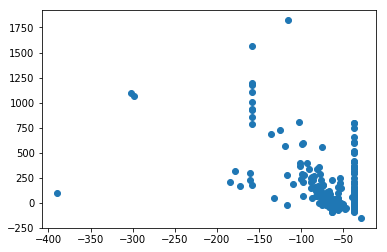

In [103]:
df299 = df_new[df_new['PromotionCondition_TotalPrice']==299.]
plt.plot(df299['PromotionDiscount'] , df299['NetProfit'], "o")

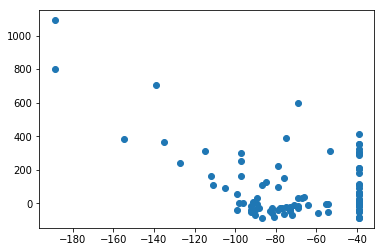

In [104]:
df399 = df_new[df_new['PromotionCondition_TotalPrice']==399.]
plt.plot(df399['PromotionDiscount'] , df399['NetProfit'], "o")

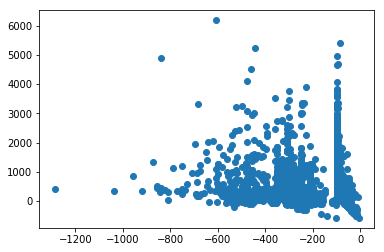

In [105]:
df666 = df_new[df_new['PromotionCondition_TotalPrice']==666.]
plt.plot(df666['PromotionDiscount'] , df666['NetProfit'], "o")

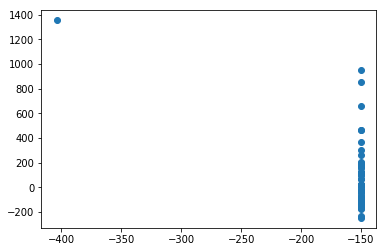

In [106]:
df777 = df_new[df_new['PromotionCondition_TotalPrice']==777.]
plt.plot(df777['PromotionDiscount'] , df777['NetProfit'], "o")

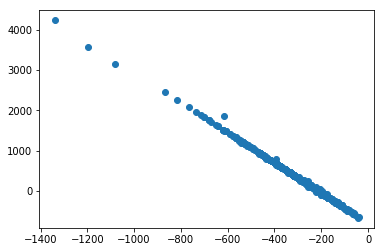

In [107]:
df799 = df_new[df_new['PromotionCondition_TotalPrice']==799.]
plt.plot(df799['PromotionDiscount'] , df799['NetProfit'], "o")

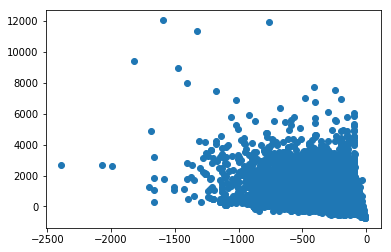

In [108]:
df800 = df_new[df_new['PromotionCondition_TotalPrice']==800.]
plt.plot(df800['PromotionDiscount'] , df800['NetProfit'], "o")

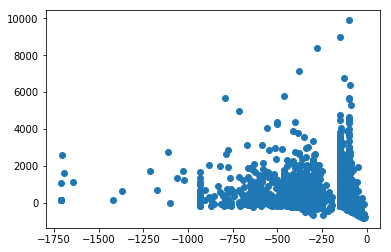

In [109]:
df888 = df_new[df_new['PromotionCondition_TotalPrice']==888.]
plt.plot(df888['PromotionDiscount'] , df888['NetProfit'], "o")

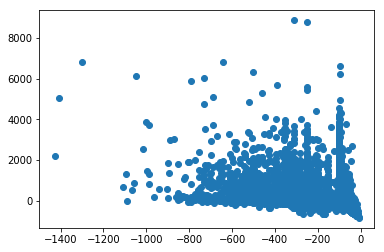

In [110]:
df899 = df_new[df_new['PromotionCondition_TotalPrice']==899.]
plt.plot(df899['PromotionDiscount'] , df899['NetProfit'], "o")

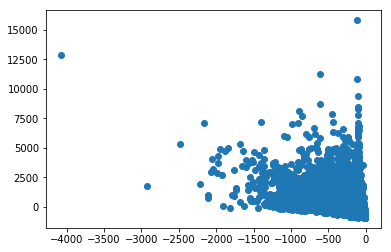

In [111]:
df1000 = df_new[df_new['PromotionCondition_TotalPrice']==1000.]
plt.plot(df1000['PromotionDiscount'] , df1000['NetProfit'], "o")

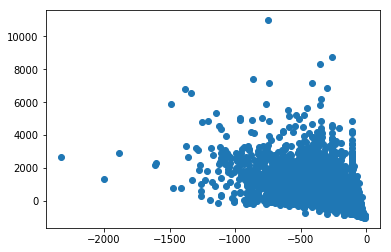

In [112]:
df1111 = df_new[df_new['PromotionCondition_TotalPrice']==1111.]
plt.plot(df1111['PromotionDiscount'] , df1111['NetProfit'], "o")

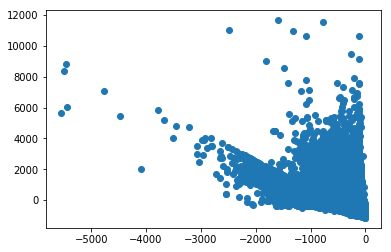

In [113]:
df1200 = df_new[df_new['PromotionCondition_TotalPrice']==1200.]
plt.plot(df1200['PromotionDiscount'] , df1200['NetProfit'], "o")

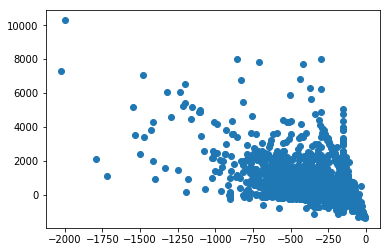

In [114]:
df1500 = df_new[df_new['PromotionCondition_TotalPrice']==1500.]
plt.plot(df1500['PromotionDiscount'] , df1500['NetProfit'], "o")

In [163]:
import matplotlib.pyplot as plt
price = [df299,df399,df666,df777,df799,df800,df888,df899,df1000,df1111,df1200,df1500]
name = ['PromotionCondition_TotalPrice:299','PromotionCondition_TotalPrice:399','PromotionCondition_TotalPrice:666','PromotionCondition_TotalPrice:777','PromotionCondition_TotalPrice:799','PromotionCondition_TotalPrice:800','PromotionCondition_TotalPrice:888','899','PromotionCondition_TotalPrice:1000','PromotionCondition_TotalPrice:1111','PromotionCondition_TotalPrice:1200','PromotionCondition_TotalPrice:1500']
# for i in range(len(price)):
#      plt.plot(price[i]['PromotionDiscount'], price[i]['NetProfit'],'o')

1


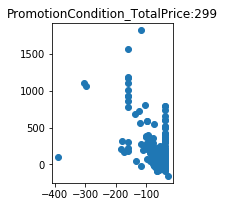

2


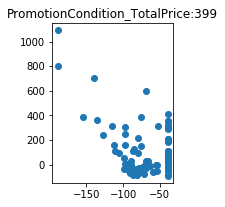

3


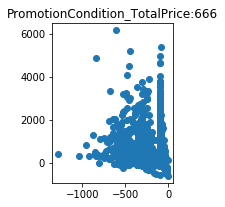

4


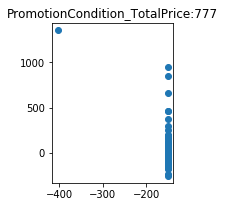

5


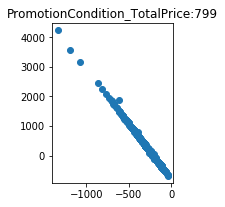

6


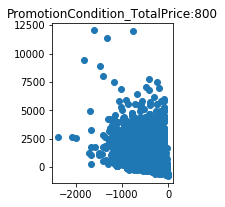

7


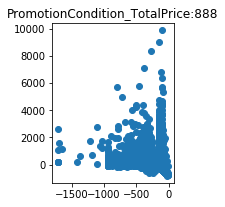

8


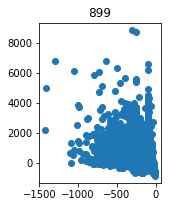

9


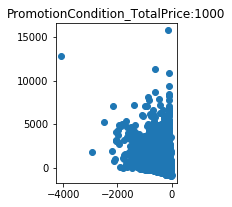

10


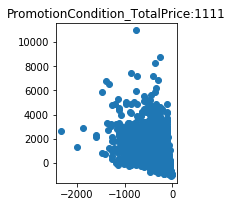

11


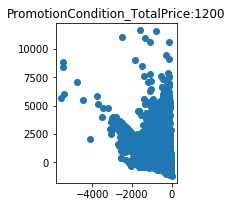

12


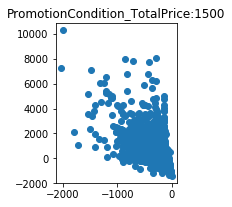

In [165]:
for i in range(1,len(price)+1):
    print(i)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(3,4,i)
    ax.plot(price[i-1]['PromotionDiscount'], price[i-1]['NetProfit'],'o')
    ax.set_title(str(name[i-1]))
    plt.show()  # 展示
   
    

## 結論：可以看出在滿額金額達800以上的分布趨勢類似，獲利大於成本，獲利多集中在0~2000之間，成本集中在1000元以下因此活動類型滿額贈或滿額打折，對他們是很有吸引力的